# Concrete Strength ML Notebook (Regression)

## Required Libraries 

In [4]:
import pandas as pd 
import numpy as np
import seaborn as sns
import os 
import matplotlib.pyplot as plt 
import warnings 

## Importing the csv file i.e the dataset is stored as a dataframe

In [5]:
df=pd.read_csv('C:\\Users\\Kaushik\\OneDrive\\Ivy Data Science Notes\\Machine Learning Module\\Regression Datasets\\ConcreteStrengthData.csv')

In [6]:
df.head()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
df.describe()

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


## Checking for NULL Values 

In [9]:
df.isnull().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

No missing values detected

## Checking datatypes

In [10]:
df.dtypes

CementComponent              float64
BlastFurnaceSlag             float64
FlyAshComponent              float64
WaterComponent               float64
SuperplasticizerComponent    float64
CoarseAggregateComponent     float64
FineAggregateComponent       float64
AgeInDays                      int64
Strength                     float64
dtype: object

Since all data types are float there is no need to do categorical handling 

## Outlier Detection
We can detect outliers by plotting histograms

array([[<AxesSubplot:title={'center':'CementComponent '}>,
        <AxesSubplot:title={'center':'BlastFurnaceSlag'}>,
        <AxesSubplot:title={'center':'FlyAshComponent'}>],
       [<AxesSubplot:title={'center':'WaterComponent'}>,
        <AxesSubplot:title={'center':'SuperplasticizerComponent'}>,
        <AxesSubplot:title={'center':'CoarseAggregateComponent'}>],
       [<AxesSubplot:title={'center':'FineAggregateComponent'}>,
        <AxesSubplot:title={'center':'AgeInDays'}>,
        <AxesSubplot:title={'center':'Strength'}>]], dtype=object)

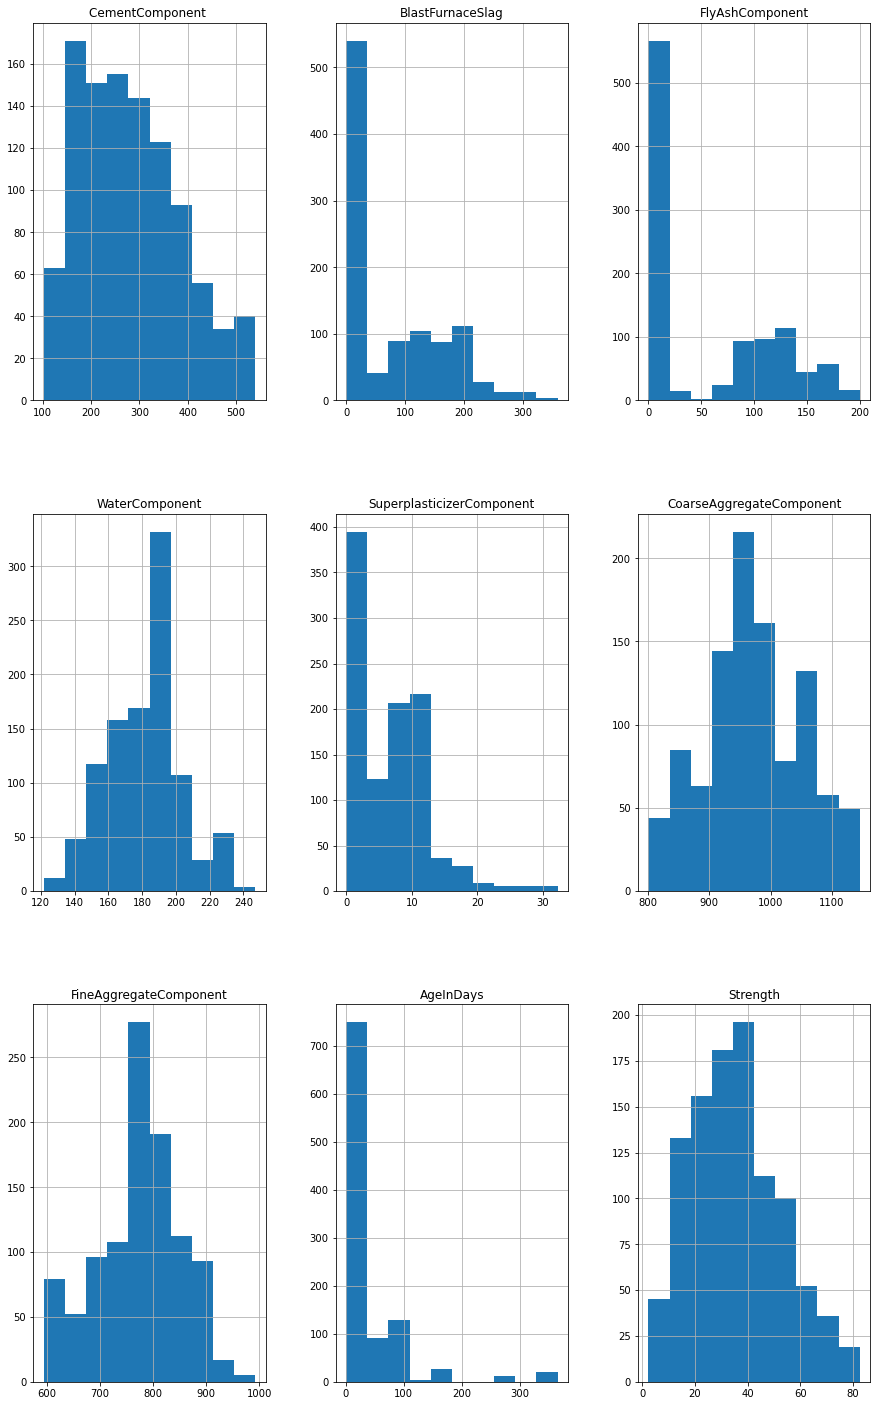

In [11]:
df.hist(figsize=(15,25))

No outliers detected

# Doing the staistical tests for identifying predictors

# Relationship exploration: Continuous Vs Continuous -- Scatter Charts
When the Target variable is continuous and the predictor is also continuous, we can visualize the relationship between the two variables using scatter plot and measure the strength of relation using pearson's correlation value.

In [12]:
df.columns

Index(['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

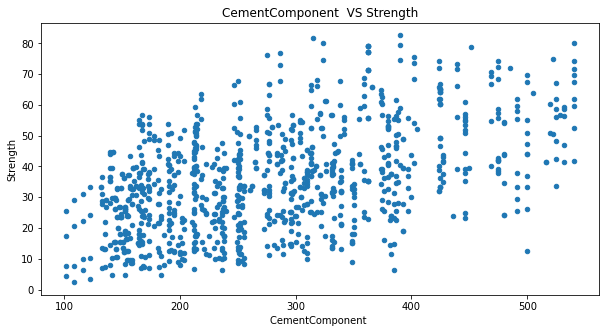

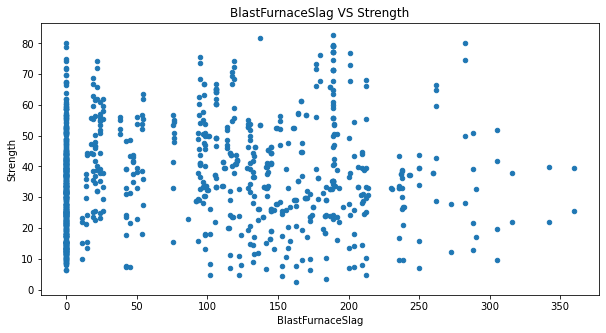

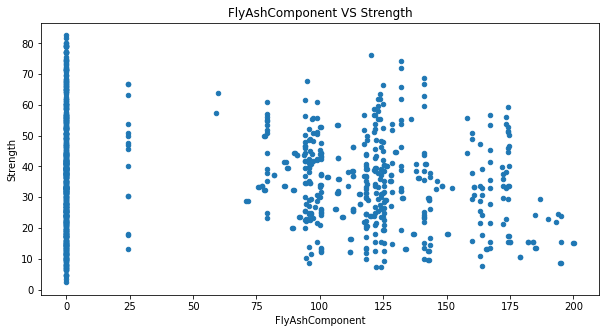

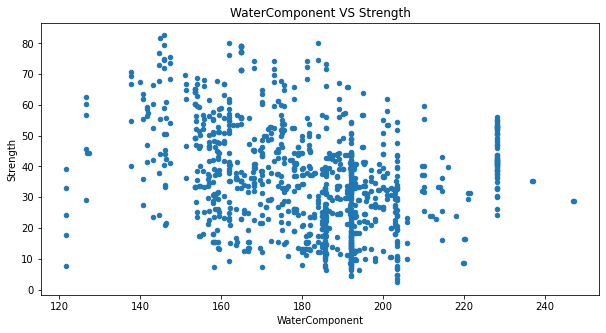

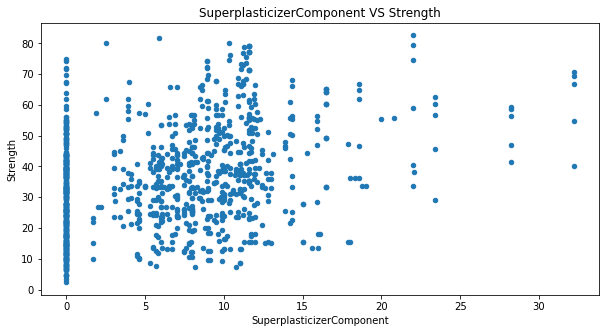

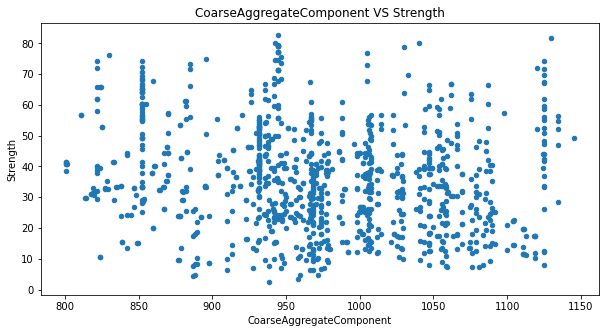

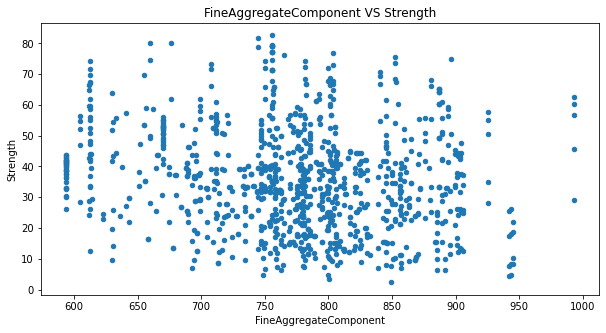

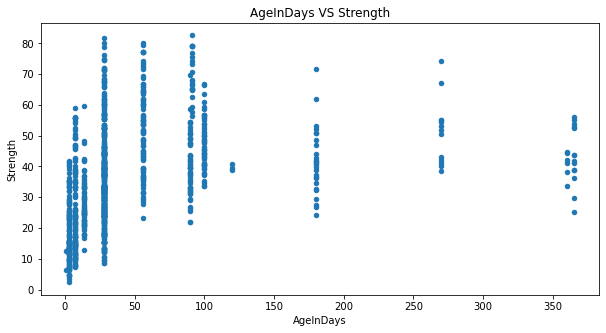

In [13]:
ContinuousCols=['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays']

# Plotting scatter chart for each predictor vs the target variable
for predictor in ContinuousCols:
    df.plot.scatter(x=predictor, y='Strength', figsize=(10,5), title=predictor+" VS "+ 'Strength')

## Correlation test

As all the variables are continuous, doing the correlation test to find the best predictors is enough. ANOVA test and chi square tests are not applicable for the present dataset

In [14]:
df.columns

Index(['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [15]:
# Calculating correlation matrix
ContinuousCols=['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays','Strength']

# Creating the correlation matrix
CorrelationData=df[ContinuousCols].corr()
CorrelationData

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
CementComponent,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
BlastFurnaceSlag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
FlyAshComponent,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
WaterComponent,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
SuperplasticizerComponent,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
CoarseAggregateComponent,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
FineAggregateComponent,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
AgeInDays,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


In [16]:
# Filtering only those columns where absolute correlation > 0.5 with Target Variable
# reduce the 0.5 threshold if no variable is selected
CorrelationData['Strength'][abs(CorrelationData['Strength']) > 0.5 ]

Strength    1.0
Name: Strength, dtype: float64

As no column is selected the threshold is reduced to 0.3

In [17]:
# Filtering only those columns where absolute correlation > 0.3 with Target Variable
CorrelationData['Strength'][abs(CorrelationData['Strength']) > 0.3 ]

CementComponent              0.497832
SuperplasticizerComponent    0.366079
AgeInDays                    0.328873
Strength                     1.000000
Name: Strength, dtype: float64

Hence we can select the columns where absolute correlation > 0.3 with Target Variable


### Best predictors are 
- CementComponent
- SuperplasticizerComponent
- AgeInDays 
- Strength

In [18]:
df.dtypes

CementComponent              float64
BlastFurnaceSlag             float64
FlyAshComponent              float64
WaterComponent               float64
SuperplasticizerComponent    float64
CoarseAggregateComponent     float64
FineAggregateComponent       float64
AgeInDays                      int64
Strength                     float64
dtype: object

In [19]:
df.columns

Index(['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [20]:
SelectColumns=['CementComponent ','SuperplasticizerComponent','AgeInDays','Strength']
DataForML=df[SelectColumns]
DataForML.head()

,CementComponent,SuperplasticizerComponent,AgeInDays,Strength
0,540.0,2.5,28,79.99
1,540.0,2.5,28,61.89
2,332.5,0.0,270,40.27
3,332.5,0.0,365,41.05
4,198.6,0.0,360,44.30


In [21]:
# Saving this final data for reference during deployment
DataForML.to_pickle('DataForML.pkl')

#### Since there are no categorical variables, there is no need of any conversion and the dataframe DataForML can directly be samplled and deployed into models.

# Machine Learning: Splitting the data into Training and Testing sample
70% of data is used as Training data and the rest 30% is used as Tesing data.

In [22]:
# Separate Target Variable and Predictor Variables
TargetVariable='Strength'
Predictors=['CementComponent ','SuperplasticizerComponent','AgeInDays']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

# Standardization/Normalization of data
You can choose not to run this step if you want to compare the resultant accuracy of this transformation with the accuracy of raw data. 

However, if you are using KNN or Neural Networks, then this step becomes necessary.

In [23]:
### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
# Sanity check for the sampled data
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(721, 3)
(721,)
(309, 3)
(309,)


In [25]:
X_train[0:4]

array([[0.21164384, 0.23291925, 0.07417582],
       [0.50913242, 0.        , 0.01648352],
       [0.49497717, 0.44409938, 0.00549451],
       [0.58675799, 0.33850932, 0.00549451]])

# Multiple Linear Regression

In [26]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
RegModel = LinearRegression()

# Printing all the parameters of Linear regression
print(RegModel)

# Creating the model on Training Data
LREG=RegModel.fit(X_train,y_train)
prediction=LREG.predict(X_test)

# Taking the standardized values to original scale


from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, LREG.predict(X_train)))

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Strength']-TestingDataResults['PredictedStrength']))/TestingDataResults['Strength'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LinearRegression()
R2 Value: 0.48280128339981654

##### Model Validation and Accuracy Calculations ##########
   Strength  PredictedStrength
0     52.91               59.0
1     55.90               44.0
2     74.50               59.0
3     35.30               43.0
4     10.54               27.0
Mean Accuracy on test data: 61.85209453997055
Median Accuracy on test data: 75.8312269103636

Accuracy values for 10-fold Cross Validation:
 [64.62314596 72.69472217 62.72961926 72.54248693 66.20097149 52.58522356
 41.35593273 54.48319936 62.51396488 63.30164084]

Final Average Accuracy of the model: 61.3


In [27]:
TestingDataResults.head()

,CementComponent,SuperplasticizerComponent,AgeInDays,Strength,PredictedStrength,APE
0,0.374429,0.000000,1.000000,52.91,59.0,11.510112
1,0.594977,0.360248,0.016484,55.90,44.0,21.288014
2,0.657306,0.683230,0.074176,74.50,59.0,20.805369
3,0.594977,0.360248,0.005495,35.30,43.0,21.813031
4,0.098174,0.248447,0.074176,10.54,27.0,156.166983


# Decision Trees

DecisionTreeRegressor(max_depth=3)
R2 Value: 0.6326245312571883

##### Model Validation and Accuracy Calculations ##########
   Strength  PredictedStrength
0     52.91               40.0
1     55.90               29.0
2     74.50               63.0
3     35.30               29.0
4     10.54               26.0
Mean Accuracy on test data: 66.99789017655823
Median Accuracy on test data: 76.31578947368422

Accuracy values for 10-fold Cross Validation:
 [76.65993076 71.22252439 68.38505105 73.78925393 69.92298617 56.13742832
 49.46489152 58.86238293 59.40985783 58.21570842]

Final Average Accuracy of the model: 64.21


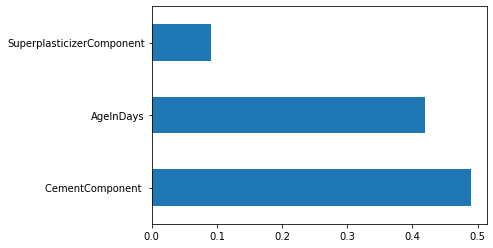

In [28]:
# Decision Trees (Multiple if-else statements!)
from sklearn.tree import DecisionTreeRegressor
RegModel = DecisionTreeRegressor(max_depth=3,criterion='mse')
# Good Range of Max_depth = 2 to 20

# Printing all the parameters of Decision Tree
print(RegModel)

# Creating the model on Training Data
DT=RegModel.fit(X_train,y_train)
prediction=DT.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, DT.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DT.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Strength']-TestingDataResults['PredictedStrength']))/TestingDataResults['Strength'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## Random Forest

RandomForestRegressor(max_depth=3)
R2 Value: 0.7109464071780447

##### Model Validation and Accuracy Calculations ##########
   Strength  PredictedStrength
0     52.91               41.0
1     55.90               34.0
2     74.50               60.0
3     35.30               31.0
4     10.54               27.0
Mean Accuracy on test data: 71.39751284053892
Median Accuracy on test data: 80.57324840764332

Accuracy values for 10-fold Cross Validation:
 [80.54585196 70.22734116 77.68664574 78.15866202 78.63556082 60.42182205
 46.99766864 61.07011876 64.86510158 62.65887356]

Final Average Accuracy of the model: 68.13


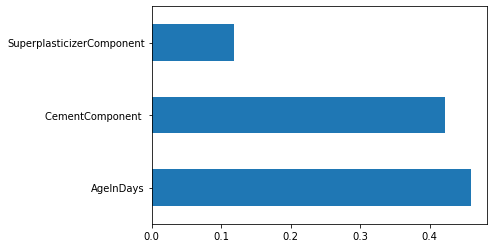

In [29]:
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestRegressor
RegModel = RandomForestRegressor(max_depth=3, n_estimators=100,criterion='mse')
# Good range for max_depth: 2-10 and n_estimators: 100-1000

# Printing all the parameters of Random Forest
print(RegModel)

# Creating the model on Training Data
RF=RegModel.fit(X_train,y_train)
prediction=RF.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, RF.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Strength']-TestingDataResults['PredictedStrength']))/TestingDataResults['Strength'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## XGBoost

XGBRegressor(base_score=None, booster='gbtree', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=0.1, max_delta_step=None, max_depth=5,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)
[16:18:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
R2 Value: 0.9345294072156676

##### Model Validation and Accuracy Calculations ##########
   Strength  PredictedStrength
0     52.91               44.0
1     55.90             

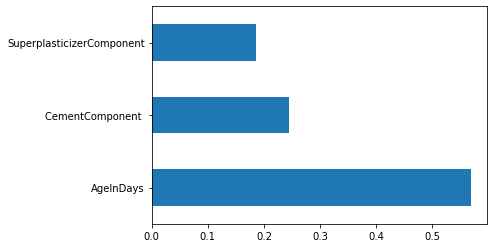

In [30]:
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=5, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:linear', 
                      booster='gbtree')

# Printing all the parameters of XGBoost
print(RegModel)

# Creating the model on Training Data
XGB=RegModel.fit(X_train,y_train)
prediction=XGB.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, XGB.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Strength']-TestingDataResults['PredictedStrength']))/TestingDataResults['Strength'])


MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)


# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

## KNN

In [31]:
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=3)

# Printing all the parameters of KNN
print(RegModel)

# Creating the model on Training Data
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

from sklearn import metrics
# Measuring Goodness of fit in Training data
print('R2 Value:',metrics.r2_score(y_train, KNN.predict(X_train)))

# Plotting the feature importance for Top 10 most important columns
# The variable importance chart is not available for KNN

###########################################################################
print('\n##### Model Validation and Accuracy Calculations ##########')

# Printing some sample values of prediction
TestingDataResults=pd.DataFrame(data=X_test, columns=Predictors)
TestingDataResults[TargetVariable]=y_test
TestingDataResults[('Predicted'+TargetVariable)]=np.round(prediction)

# Printing sample prediction values
print(TestingDataResults[[TargetVariable,'Predicted'+TargetVariable]].head())

# Calculating the error for each row
TestingDataResults['APE']=100 * ((abs(
  TestingDataResults['Strength']-TestingDataResults['PredictedStrength']))/TestingDataResults['Strength'])

MAPE=np.mean(TestingDataResults['APE'])
MedianMAPE=np.median(TestingDataResults['APE'])

Accuracy =100 - MAPE
MedianAccuracy=100- MedianMAPE
print('Mean Accuracy on test data:', Accuracy) # Can be negative sometimes due to outlier
print('Median Accuracy on test data:', MedianAccuracy)

# Defining a custom function to calculate accuracy
# Make sure there are no zeros in the Target variable if you are using MAPE
def Accuracy_Score(orig,pred):
    MAPE = np.mean(100 * (np.abs(orig-pred)/orig))
    #print('#'*70,'Accuracy:', 100-MAPE)
    return(100-MAPE)

# Custom Scoring MAPE calculation
from sklearn.metrics import make_scorer
custom_Scoring=make_scorer(Accuracy_Score, greater_is_better=True)

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

KNeighborsRegressor(n_neighbors=3)
R2 Value: 0.8629284760776639

##### Model Validation and Accuracy Calculations ##########
   Strength  PredictedStrength
0     52.91               33.0
1     55.90               38.0
2     74.50               52.0
3     35.30               31.0
4     10.54               22.0
Mean Accuracy on test data: 73.95072991797436
Median Accuracy on test data: 81.22461730709153

Accuracy values for 10-fold Cross Validation:
 [69.55407621 78.28304617 74.97654454 78.40013979 72.34298472 69.91753824
 64.44390593 74.61071685 72.67038838 70.57620109]

Final Average Accuracy of the model: 72.58


# Deployment of the Model

Based on the above trials you select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them. 

<b>XG Boost is chosen due to it's accuracy</b>

In order to deploy the model we follow below steps
1. Train the model using 100% data available
2. Save the model as a serialized file which can be stored anywhere
3. Create a python function which gets integrated with front-end(Tableau/Java Website etc.) to take all the inputs and returns the prediction

## Choosing only the most important variables
Its beneficial to keep lesser number of predictors for the model while deploying it in production. The lesser predictors you keep, the better because, the model will be less dependent hence, more stable.

This is important specially when the data is high dimensional(too many predictor columns).

In this data, the most important predictor variables are 'Age', 'KM',and 'Weight'.

As these are consistently on top of the variable importance chart for every algorithm. Hence choosing these as final set of predictor variables.

In [32]:
DataForML.head()

,CementComponent,SuperplasticizerComponent,AgeInDays,Strength
0,540.0,2.5,28,79.99
1,540.0,2.5,28,61.89
2,332.5,0.0,270,40.27
3,332.5,0.0,365,41.05
4,198.6,0.0,360,44.30


In [33]:
# Separate Target Variable and Predictor Variables
TargetVariable='Strength'

# Selecting the final set of predictors for the deployment
# Based on the variable importance charts of multiple algorithms above
Predictors=['CementComponent ', 'SuperplasticizerComponent', 'AgeInDays']

X=DataForML[Predictors].values
y=DataForML[TargetVariable].values

### Sandardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results

# Choose between standardization and MinMAx normalization
#PredictorScaler=StandardScaler()
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

print(X.shape)
print(y.shape)

(1030, 3)
(1030,)


#### Cross validating the final model accuracy with less predictors

In [34]:
# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Using final hyperparameters
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=5, 
                      learning_rate=0.1, 
                      n_estimators=100, 
                      objective='reg:squarederror', 
                      booster='gbtree')

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RegModel, X , y, cv=10, scoring=custom_Scoring)
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


Accuracy values for 10-fold Cross Validation:
 [80.2905353  83.38082305 79.28719447 81.09374504 79.86896968 74.644326
 60.48494985 77.29280031 75.71090451 76.2919909 ]

Final Average Accuracy of the model: 76.83


In [35]:
import warnings
warnings.filterwarnings('ignore')

#### Step 1. Retraining the model using 100% data

In [36]:
# Training the model on 100% Data available
Final_XGB_Model=RegModel.fit(X,y)

#### Step 2. Save the model as a serialized file which can be stored anywhere

In [37]:
import pickle
import os

# Saving the Python objects as serialized files can be done using pickle library
# Here let us save the Final model
with open('Final_XGB_Model.pkl', 'wb') as fileWriteStream:
    pickle.dump(Final_XGB_Model, fileWriteStream)
    # Don't forget to close the filestream!
    fileWriteStream.close()
    
print('pickle file of Predictive Model is saved at Location:',os.getcwd())

pickle file of Predictive Model is saved at Location: C:\Users\Kaushik\OneDrive\Ivy Data Science Notes\Python Programs\Python CW


#### Step 3. Create a python function

In [38]:
# This Function can be called from any from any front end tool/website
def FunctionPredictResult(InputData):
    import pandas as pd
    Num_Inputs=InputData.shape[0]
    
    # Making sure the input data has same columns as it was used for training the model
    # Also, if standardization/normalization was done, then same must be done for new input
    
    # Appending the new data with the Training data
    DataForML=pd.read_pickle('DataForML.pkl')
    InputData=InputData.append(DataForML)
    
    # Generating dummy variables for rest of the nominal variables
    InputData=pd.get_dummies(InputData)
            
    # Maintaining the same order of columns as it was during the model training
    Predictors=['CementComponent ','SuperplasticizerComponent','AgeInDays']
    
    # Generating the input values to the model
    X=InputData[Predictors].values[0:Num_Inputs]
    
    # Generating the standardized values of X since it was done while model training also
    X=PredictorScalerFit.transform(X)
    
    # Loading the Function from pickle file
    import pickle
    with open('Final_XGB_Model.pkl', 'rb') as fileReadStream:
        PredictionModel=pickle.load(fileReadStream)
        # Don't forget to close the filestream!
        fileReadStream.close()
            
    # GenPrice Predictions
    Prediction=PredictionModel.predict(X)
    PredictionResult=pd.DataFrame(Prediction, columns=['Prediction'])
    return(round(PredictionResult))

In [39]:
# Calling the function for some new data
NewSampleData=pd.DataFrame(
data=[[338,2.8,50],
     [302,3.6,78],
     [380,4.4,84]],
columns=['CementComponent ','SuperplasticizerComponent','AgeInDays'])

print(NewSampleData)

# Calling the Function for prediction
FunctionPredictResult(InputData= NewSampleData)

   CementComponent   SuperplasticizerComponent  AgeInDays
0               338                        2.8         50
1               302                        3.6         78
2               380                        4.4         84


,Prediction
0,45.0
1,37.0
2,57.0
